# Author: Mayank Raj

# Task 2: Prediction using Unsupervised ML

### Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Importing the dataset

In [2]:
data = pd.read_csv("Iris.csv")
print("Data imported successfully")
data.head(10)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#### The data contains different samples of flowers with Sepal length and width and Petal length and width. Our task is to predict different clusters according to these four features. 

#### Oue dataset also has column Species which contains the actual species of each sample. Generally we don't have that data present with us but in this case, we can use it to evaluate our data.

## 1. Understanding the data

In [3]:
print("The shape of data is: ",data.shape)

The shape of data is:  (150, 6)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The dataset has no null values and all coulmns are of proper datatype

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Iris dataset is completely balanced for each type of species, therefore we can get an even result with clustering algorithms

## 2. Cleaning data

The data has coulmn ID with no meaning to us, therefore we can drop the column

In [8]:
data.drop(columns = ['Id'],axis = 1,inplace=True)

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Visualizing the data

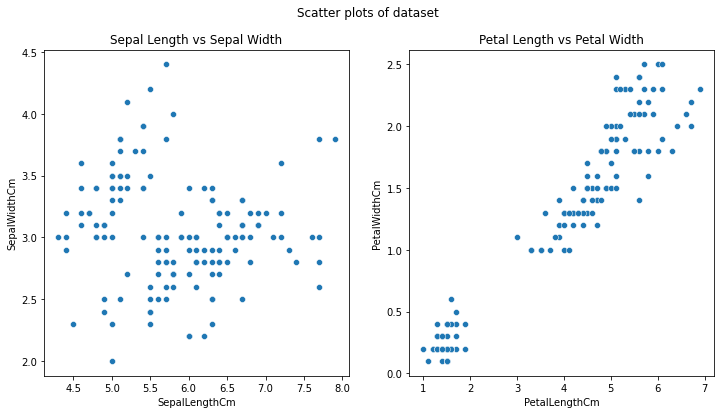

In [10]:
fig,axis = plt.subplots(1,2,figsize=(12,6))

sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'],ax = axis[0])
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],ax = axis[1])
axis[0].set_title("Sepal Length vs Sepal Width")
axis[1].set_title("Petal Length vs Petal Width")
fig.suptitle("Scatter plots of dataset")
plt.show()

There can be different clusters therefore we can use K-Means clustering for finding the clusters.

## 3. Preparing the data

First feature set for our modelling is separated.

In [11]:
features = data.iloc[:,0:4]
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 4. Finding the best k for K-Means clustering

### We can use the elbow method to find the number of clusters best for our data

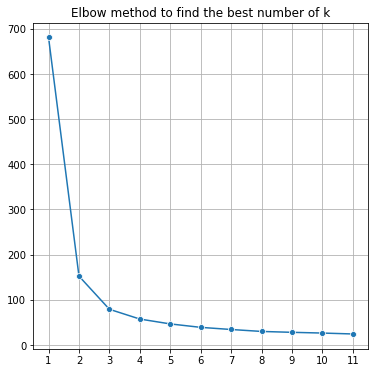

In [12]:
from sklearn.cluster import KMeans
distortions = []

for x in range(1,12):
    k_means = KMeans(init = "k-means++", n_clusters = x, n_init = 16)
    k_means.fit(features)
    distortions.append(k_means.inertia_)
    
plt.figure(figsize=(6,6))
sns.lineplot(x=range(1,12),y=distortions,marker='o')
plt.xticks(np.arange(1,12,1))
plt.title("Elbow method to find the best number of k")
plt.grid()
plt.show()

According to elbow method 3 clusters is the best value of K for our K-Means clustering model. 

# 5. Modelling and Prediction

In [13]:
best_cluster = 3
k_means_final = KMeans(init="k-means++",n_clusters = best_cluster, max_iter = 300,n_init=16,random_state=0)
k_means_final.fit(features)


KMeans(n_clusters=3, n_init=16, random_state=0)

In [14]:
centers=k_means_final.cluster_centers_;
print(centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Taking out clusters as cluster numbers from K-Means object and mapping to text representation of cluster numbers

In [15]:
data['Cluster'] = k_means_final.labels_
data['Predicted Species'] = data['Cluster'].map({1:'Iris-setosa',2:'Iris-versicolor',0:'Iris-virginica'})

Plotting the predicted species according to sepal length and width

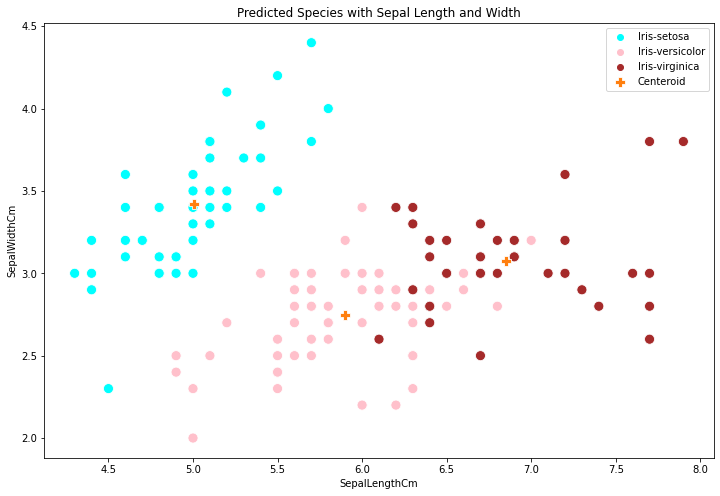

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'],hue=data['Predicted Species'],\
                palette = ['cyan','pink','brown'],s=101)
sns.scatterplot(x=centers[:,0],y=centers[:,1], palette = 'yellow',s=101,marker = 'P',label='Centeroid')
plt.title("Predicted Species with Sepal Length and Width")
plt.show()

Plotting the predicted species according to petal length and width

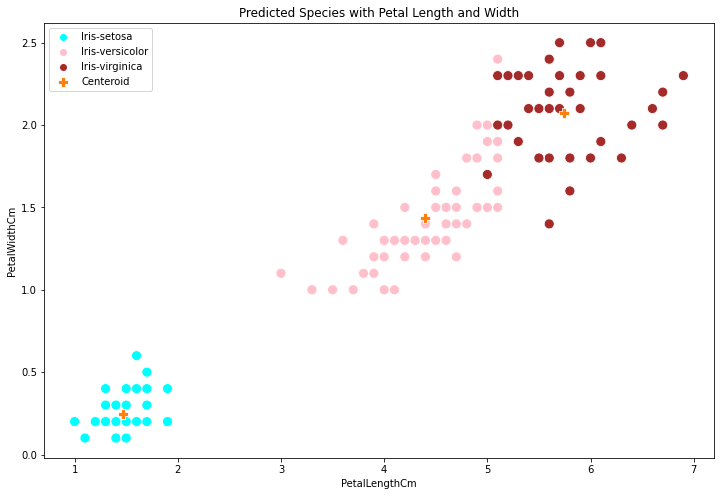

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],hue=data['Predicted Species'],\
                palette = ['cyan','pink','brown'],s=101)
sns.scatterplot(x=centers[:,2],y=centers[:,3], palette = 'yellow',s=101,marker = 'P',label='Centeroid')
plt.title("Predicted Species with Petal Length and Width")
plt.show()

# 6. Model Evaluation

### Although model evaluation is not possible in case of unsupervised Machine Learning but we are already given the Species of each sample therefore we can evaluate our model based on it

First, check the total number of samples according to prediced species

In [18]:
data['Predicted Species'].value_counts()

Iris-versicolor    62
Iris-setosa        50
Iris-virginica     38
Name: Predicted Species, dtype: int64

According to this, there were 50 samples in case of each species but we get a difference of 12. 

Further check the samples where the Actual Species is not equal to Predicted Species

In [19]:
print('The number of rows in below table is : ',data[data['Species']!=data['Predicted Species']].shape[0])
data[data['Species']!=data['Predicted Species']]

The number of rows in below table is :  16


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Predicted Species
52,6.9,3.1,4.9,1.5,Iris-versicolor,0,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor,0,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica,2,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica,2,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica,2,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica,2,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica,2,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica,2,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica,2,Iris-versicolor
126,6.2,2.8,4.8,1.8,Iris-virginica,2,Iris-versicolor


From here we can conclude that there are total of 16 samples where model prediction is not correct.

We can visualize this using scatter plot with different colors and markers.

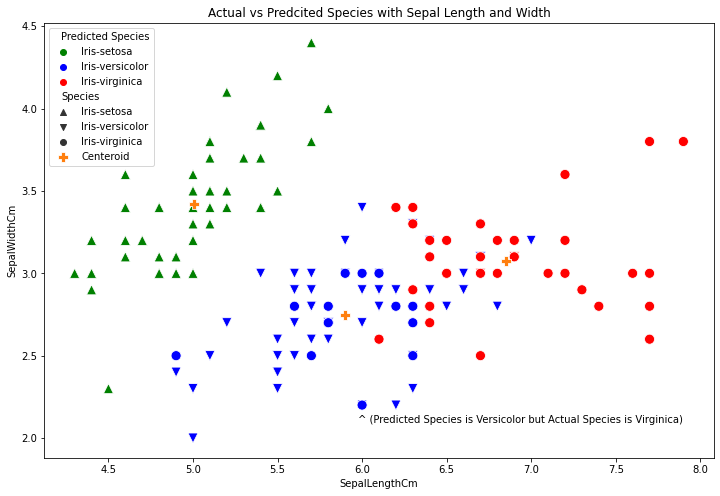

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'],hue=data['Predicted Species'],style = data['Species'],\
                palette = ['green','blue','red'],s=101,markers=['^','v','o'])
sns.scatterplot(x=centers[:,0],y=centers[:,1], palette = 'yellow',s=101,marker = 'P',label='Centeroid')
plt.title("Actual vs Predcited Species with Sepal Length and Width")
plt.annotate('^ (Predicted Species is Versicolor but Actual Species is Virginica)',(5.974,2.09))
plt.show()

In the plot above, the **color of points define different Predicted Species** whereas **marker of points define different Actual Species**. 

For some points, we can see that Predicted Species does not match with Actual species of sample. These points represent the samples with incorrect prediction. For example, one such point has been anotated.

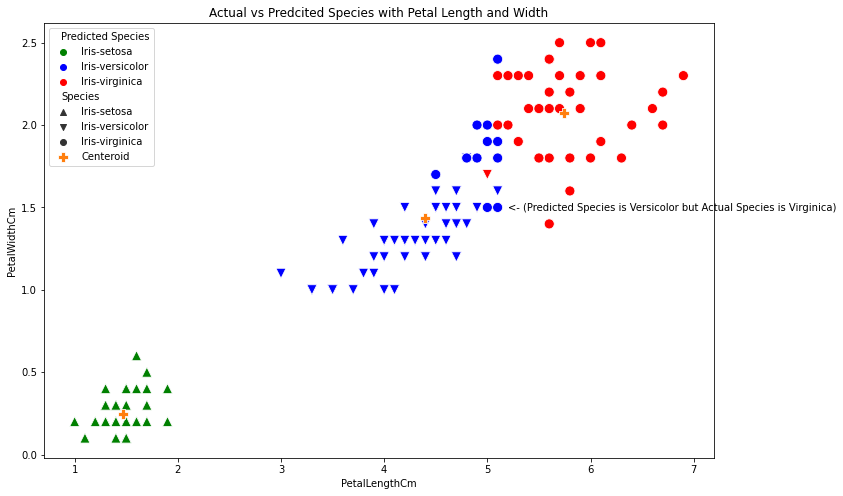

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],hue=data['Predicted Species'],style = data['Species'],\
                palette = ['green','blue','red'],s=101,markers=['^','v','o'])
sns.scatterplot(x=centers[:,2],y=centers[:,3], palette = 'yellow',s=101,marker = 'P',label='Centeroid')
plt.title("Actual vs Predcited Species with Petal Length and Width")
plt.annotate('<- (Predicted Species is Versicolor but Actual Species is Virginica)',(5.2,1.48))
plt.show()